In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/datasets/credit_card_default.csv')

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

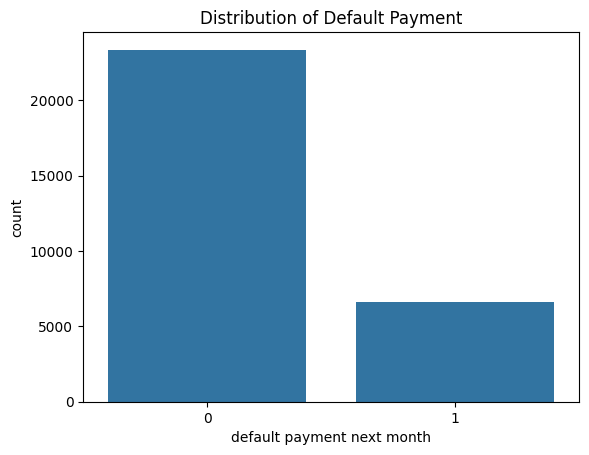

In [9]:
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payment')
plt.show()

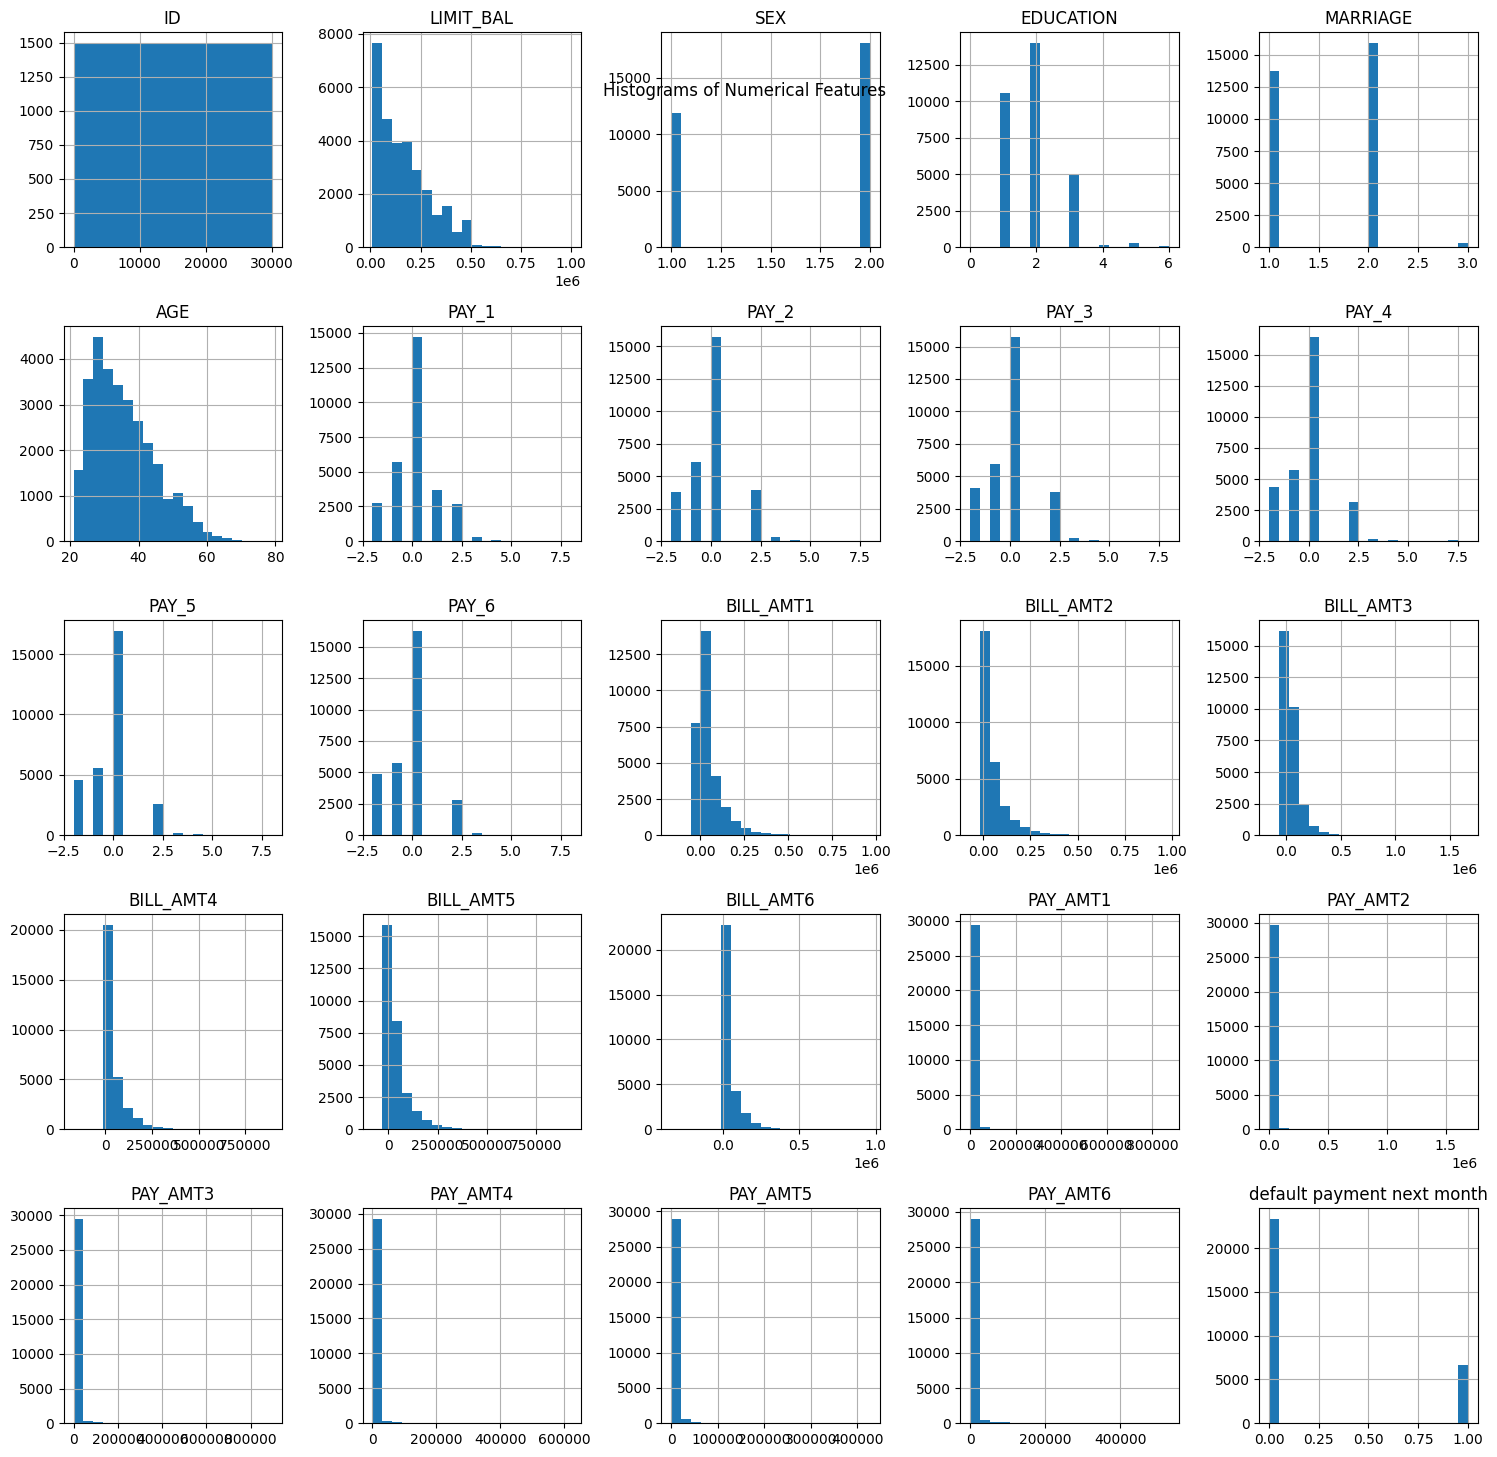

In [10]:
df.hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Numerical Features', y=0.92)
plt.tight_layout()
plt.show()

In [11]:
target_column = 'default payment next month'
correlations = df.corr()[target_column].sort_values(ascending=False)

<ipython-input-12-95112f3701a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")


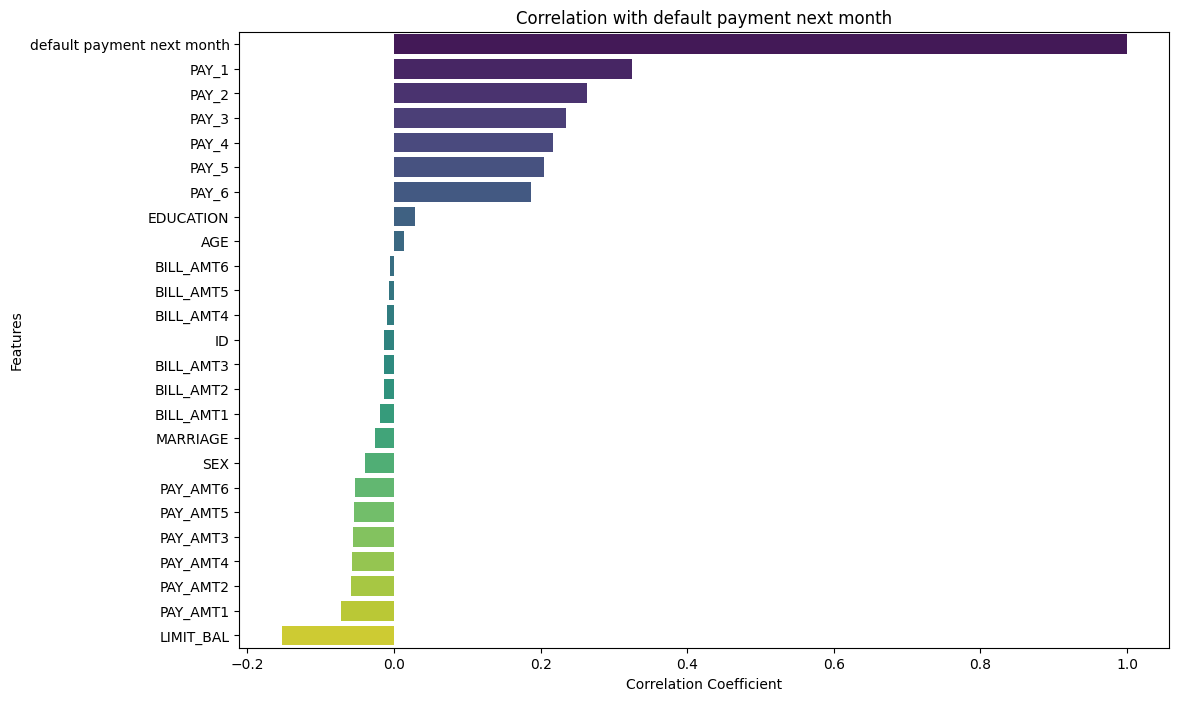

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")
plt.title(f'Correlation with {target_column}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

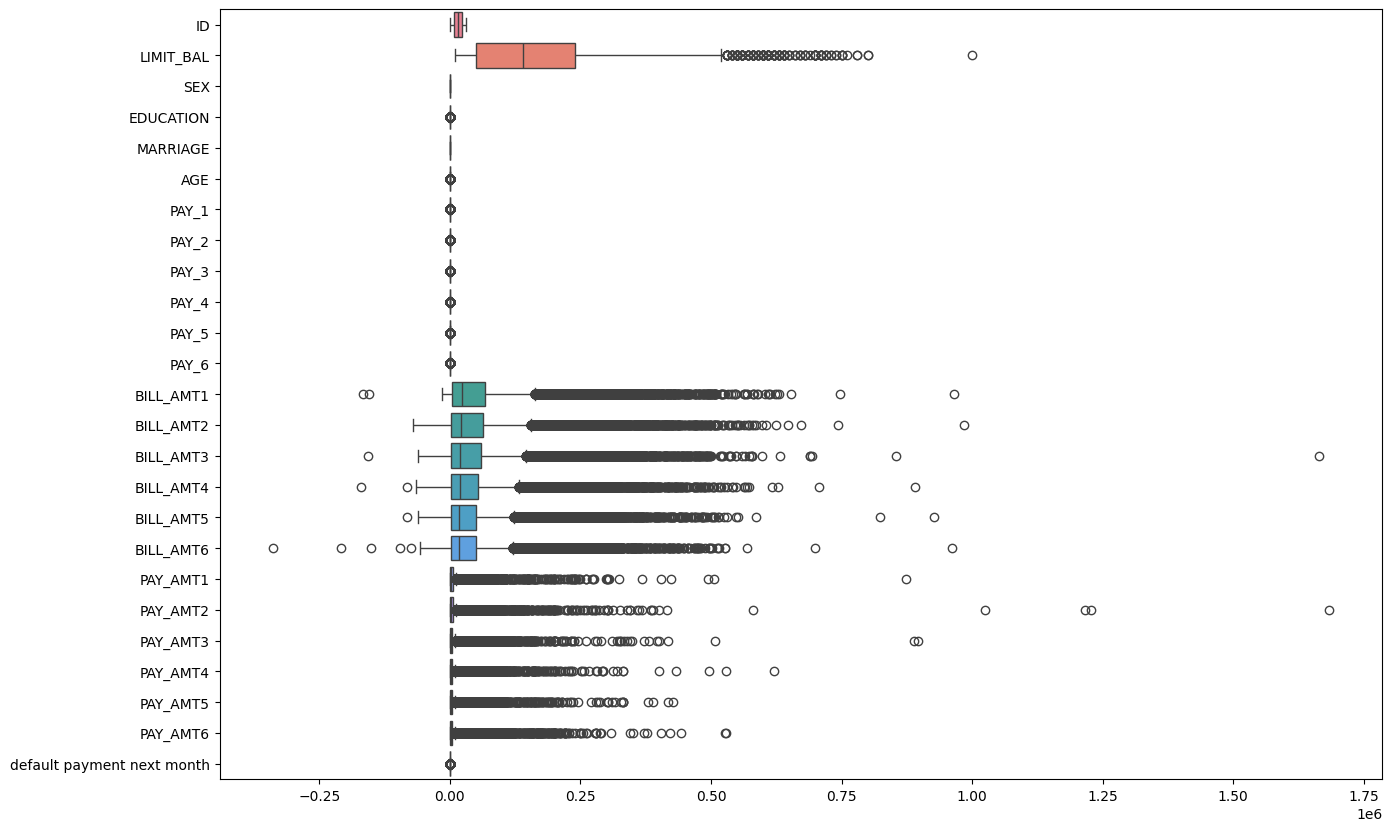

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.show()

In [14]:
def handle_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(column, lower_bound, upper_bound)

In [15]:
# Handling outliers in 'LIMIT_BAL'

df['LIMIT_BAL'] = handle_outliers_iqr(df['LIMIT_BAL'])

In [16]:
# Handling outliers in 'BILL_AMT1' to 'BILL_AMT6'

bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for column in bill_columns:
    df[column] = handle_outliers_iqr(df[column])

In [17]:
# Handling outliers in 'PAY_AMT1' to 'PAY_AMT6'

pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for column in pay_columns:
    df[column] = handle_outliers_iqr(df[column])

In [18]:
target_variable = 'default payment next month'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
models = [
    ('K Neighbors', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    ('Support Vector Machine', SVC(), {'kernel': ['linear'], 'C': [0.1, 1]}),
    ('Gradient Boosting', GradientBoostingClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1]}),
    ('AdaBoost', AdaBoostClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1]}),
    ('XGBoost', XGBClassifier(), {'n_estimators': [50, 100, 150], 'max_depth': [3, 5]})]

In [31]:
for model_name, model, param_grid in models:
    print(f"Training the {model_name} model with cross-validation and hyperparameter tuning...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_

    final_model = model.set_params(**best_params)
    final_model.fit(X_train_scaled, y_train)

    predictions = final_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, predictions)
    print(f"How accurate is the {model_name}? {accuracy:.4f}")
    print(f"Best hyperparameters: {best_params}")
    print(f"Here's a more detailed report:\n", classification_report(y_test, predictions))
    print("-" * 30)

Training the K Neighbors model with cross-validation and hyperparameter tuning...
How accurate is the K Neighbors? 0.7990
Best hyperparameters: {'n_neighbors': 7}
Here's a more detailed report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4673
           1       0.58      0.33      0.42      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000

------------------------------
Training the Support Vector Machine model with cross-validation and hyperparameter tuning...
How accurate is the Support Vector Machine? 0.8080
Best hyperparameters: {'C': 1, 'kernel': 'linear'}
Here's a more detailed report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.68      0.25      0.36      1327

    accuracy                           0.81      6000
  